# Quiz 1

BEFORE YOU START THIS QUIZ:

1. Click on "Copy to Drive" to make a copy of the quiz

2. Click on "Share",
    
3. Click on "Change" and select "Anyone with this link can edit"
    
4. Click "Copy link" and

5. Paste the link into [this Canvas assignment](https://canvas.olin.edu/courses/315/assignments/4853). If you are not in my class, that link will not work for you.

This quiz is based on Chapters 2 and 3 of [Think Complexity, 2nd edition](https://thinkcomplex.com).

Copyright 2021 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

## Question 1

For the first two questions, we will extend the Erdos-Renyi experiment to directed graphs.

NetworkX provides a function called `erdos_renyi_graph` that makes an Erdos-Renyi graph with `n` nodes and probability `p` that each edge exists.

With the keyword argument `directed=True`, it makes a directed graph. Here's an example.

In [1]:
import networkx as nx

n = 10
p = 0.4

er = nx.erdos_renyi_graph(n, p, directed=True)

The following function draws the graph.

In [31]:
def draw_graph(G):
    """Draw a graph with node labels.
    
    G: NetworkX graph
    """
    nx.draw_circular(G, node_color='C4', node_size=500, with_labels=True)

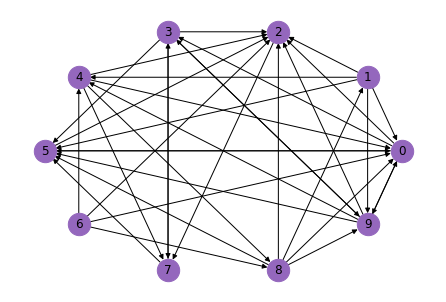

In [32]:
draw_graph(er)

NetworkX also provides a function called `is_strongly_connected`, which takes a directed graph as a parameter and returns `True` if the graph is strongly connected.

Here's how we can use it with the example graph.

In [33]:
nx.is_strongly_connected(er)

False

Fill in the body of the following function so it estimates the probability that a directed ER graph is strongly connected.

The number of graphs it should create is `iters`; it should return the fraction that are strongly connected.

In [5]:
def prob_strongly_connected(n, p, iters=100):
    """Estimates the probability that a directed ER graph is strongly connected.
    
    n: number of nodes
    p: probability each edge exists
    iters: number of graphs to test
    
    returns: the fraction of graphs that are strongly connected
    """
    # FILL THIS IN
    return 0

In [6]:
# Solution

def prob_strongly_connected(n, p, iters=100):
    """Estimates the probability that a directed ER graph is strongly connected.
    
    n: number of nodes
    p: probability each edge exists
    iters: number of graphs to test
    
    returns: the fraction of graphs that are strongly connected
    """
    count = 0
    for i in range(iters):
        er = nx.erdos_renyi_graph(n, p, directed=True)
        if nx.is_strongly_connected(er):
            count += 1
    return count/iters

Use the following cell to test your function.

In [7]:
prob_strongly_connected(n, p)

0.73

## Question 2

Now we'd like to see how the probability of being strongly connected depends on `p`.

First we'll create an array with a range of values of `p`.

In [8]:
import numpy as np

ps = np.logspace(-1.3, 0, 11)
ps

array([0.05011872, 0.0676083 , 0.09120108, 0.12302688, 0.16595869,
       0.22387211, 0.30199517, 0.40738028, 0.54954087, 0.74131024,
       1.        ])

Next we'll call the function from the previous section with each value of `p`.

In [9]:
ys = [prob_strongly_connected(n, p) for p in ps]
ys

[0.0, 0.0, 0.0, 0.0, 0.03, 0.15, 0.42, 0.84, 0.98, 1.0, 1.0]

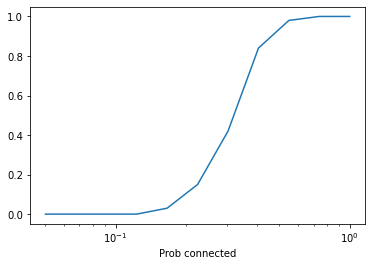

In [10]:
import matplotlib.pyplot as plt

plt.plot(ps, ys)
plt.xlabel('Prob of edge (p)')
plt.xlabel('Prob connected')
plt.xscale('log')

As you might have expected, there's a a transition between two regimes:

* For low values of `p`, the probability of a strongly connected graph is low.

* For high values of `p`, the probability of a strongly connected graph is high.

Do you expect the location of this transition to be higher or lower than the critical value, $p^*$, derived by Erdos and Renyi? Why?

In the space below, write 1-3 clear, concise, complete sentences that explain your answer.


In [11]:
# Solution

"""I expect it to be higher because it is harder for a directed
graph to be strongly connected than for an undirected graph to be connected;
that is, I expect it to take more edges.

For example, if we start with a connected undirected graph and make it directed
by making all of the edges one-way, there's a good chance the result is not
strongly connected. It's likely we would have to add edges to make it strongly
connected.

""";

## Question 3

NetworkX provides a function called `watts_strogatz_graph` that makes a Watts-Strogatz graph with `n` nodes, where each node is connected to `k` others, and the probability of rewiring an edge is `p`.

Here's an example.

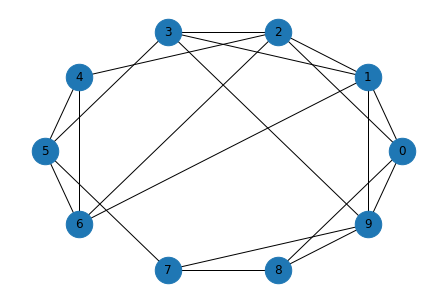

In [12]:
n = 10
k = 4
p = 0.2

ws = nx.watts_strogatz_graph(n, k, p)
draw_graph(ws)

NetworkX also provides a function called `closeness_centrality` that computes, for each node, a metric called "closeness centrality", [which you can read about here](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality).

Here's how it works.

In [13]:
nx.closeness_centrality(ws)

{0: 0.6,
 1: 0.6923076923076923,
 2: 0.6428571428571429,
 3: 0.6428571428571429,
 4: 0.5294117647058824,
 5: 0.6,
 6: 0.6,
 7: 0.5625,
 8: 0.5294117647058824,
 9: 0.6428571428571429}

Fill in the body of the following function so that it creates one Watts-Strogatz graph with the given parameters and returns the mean closeness centrality, averaged across the nodes.

In [14]:
def mean_closeness_centrality(n, k, p):
    """Compute the average of the closeness centrality for each node.
    
    n: number of nodes
    k: number of edges for each node
    p: probability of rewiring
    """
    # FILL THIS IN
    return 0

In [15]:
# Solution

def mean_closeness_centrality(n, k, p):
    """Compute the average of the closeness centrality for each node.
    
    n: number of nodes
    k: number of edges for each node
    p: probability of rewiring
    """
    ws = nx.watts_strogatz_graph(n, k, p)
    d = nx.closeness_centrality(ws)
    return np.mean(list(d.values()))

Use the following cell to test your function.

In [16]:
mean_closeness_centrality(n, k, p)

0.6269093406593408

## Question 4

The following function runs `mean_closeness_centrality` for a range of values for `p` and returns an array of mean closeness centralities, one for each value of `p`.

In [17]:
def run_experiment(ps, n=1000, k=10):
    """Computes mean closeness centrality for WS graphs with a range of `p`.
    
    ps: sequence of `p` to try
    n: number of nodes
    k: degree of each node
    
    returns: array of mean closeness_centrality
    """
    res = []
    for p in ps:
        metric = mean_closeness_centrality(n, k, p) 
        res.append(metric)
    return np.array(res)

Now we'll run it with an array of values for `p`. This might take a few seconds.

In [18]:
ps = np.logspace(-4, 0, 9)
ps

array([1.00000000e-04, 3.16227766e-04, 1.00000000e-03, 3.16227766e-03,
       1.00000000e-02, 3.16227766e-02, 1.00000000e-01, 3.16227766e-01,
       1.00000000e+00])

In [19]:
mcc = run_experiment(ps)
mcc

array([0.03043911, 0.02560553, 0.04070766, 0.05863695, 0.1156313 ,
       0.17090281, 0.21877453, 0.28035792, 0.30610306])

If your code in the previous section did not work, you can use the following values:

In [38]:
# mcc = np.array([0.03043911, 0.02560553, 0.04070766, 0.05863695, 0.1156313, 0.17090281, 0.21877453, 0.28035792, 0.30610306])

We'll normalize the values in `mcc` so the *last* one is 1.0

In [39]:
M = mcc / mcc[-1]

And plot the results.

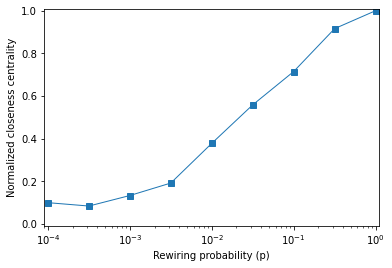

In [40]:
plt.plot(ps, M, 's-', linewidth=1, label='M(p) / M(0)')
plt.xlabel('Rewiring probability (p)')
plt.xscale('log')
plt.ylabel('Normalized closeness centrality')
plt.xlim([0.00009, 1.1])
plt.ylim([-0.01, 1.01]);

Suppose another student in the class asked you to interpret this graph. In a few clear, concise, complete sentences, explain what closeness centrality means in the context of a social network. What, if anything, does this graph tell us about small world graphs?

In [22]:
# Solution

"""
For each node, centrality closeness is the inverse of the 
mean distance to all other nodes, so high closeness means a node
is close to all other nodes.

In a social network, that means the average number of degrees of
separation is small.

If the average closeness in a graph is high, that means that
distances between nodes are short, as in a small world graph.

In this example, `mcc` does not increase as fast as I expected.
You have to rewire a lot of edges to get high `mcc`.

So it looks like there may be no range of ps where both clustering
and closeness are high.

""";